___
# Ciência dos Dados - PROJETO 1

## Por: Matteo Iannoni
___

## Titulo: Domicilios em diferentes classes sociais usam aparelhos diferentes para acessar a internet?

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matteo Iannoni\Documents\GitHub\CDD_P1


In [4]:
## FUNCOES
def setcat(var, categories_list):
    var = var.astype("category")
    var.cat.categories = categories_list
    return var

In [111]:
DataFrame = pd.read_csv('DOM2015.csv',sep=',')

df_filtro_grosso = pd.DataFrame({"TemCelular":DataFrame["V0220"],
                                 "TemTablet":DataFrame["V02321"],
                                "TemComputador":DataFrame["V0231"],
                                 "Tablet":DataFrame["V02325"],
                                "Computador":DataFrame["V02323"],
                                "Celular":DataFrame["V02324"],
                                "RendaPerCapita":DataFrame["V4621"]})

df_filtro_grosso = df_filtro_grosso.dropna(how = "any")
df_filtro_grosso = df_filtro_grosso[(df_filtro_grosso.TemCelular == 2) & (df_filtro_grosso.TemComputador == 1) & (df_filtro_grosso.TemTablet == 2) & (df_filtro_grosso["RendaPerCapita"] <= 200000)]

df_filtro_grosso["Computador"] = df_filtro_grosso["Computador"].astype("category")
df_filtro_grosso["Computador"] = setcat(df_filtro_grosso["Computador"],["Sim","Nao"])

df_filtro_grosso["Celular"] = df_filtro_grosso["Celular"].astype("category")
df_filtro_grosso["Celular"] = setcat(df_filtro_grosso["Celular"],["Sim","Nao"])

df_filtro_grosso["Tablet"] = df_filtro_grosso["Tablet"].astype("category")
df_filtro_grosso["Tablet"] = setcat(df_filtro_grosso["Tablet"],["Sim","Nao"])

df_filtro_grosso = df_filtro_grosso.iloc[:,[0,1,3,2]]

df_filtro_grosso.head()

,Celular,Computador,Tablet,RendaPerCapita
31,Sim,Sim,Sim,3000.0
32,Nao,Sim,Nao,366.0
39,Sim,Sim,Sim,196.0
93,Sim,Sim,Nao,512.0
167,Sim,Sim,Sim,1095.0


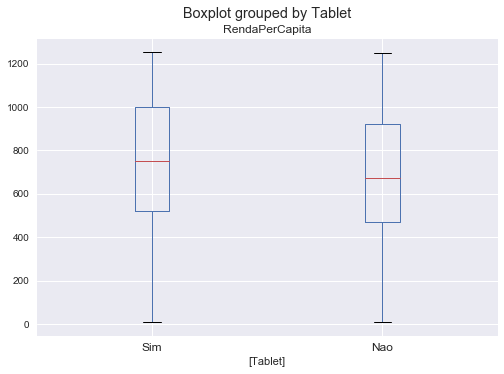

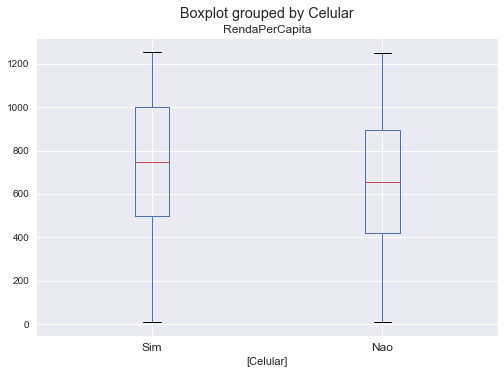

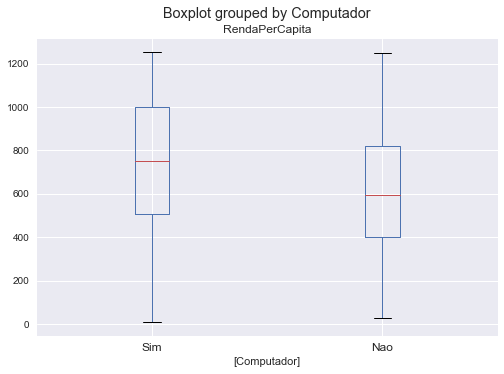

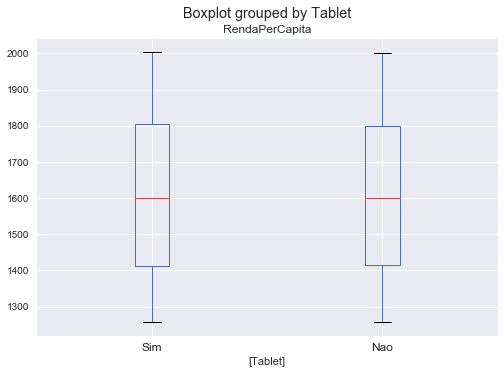

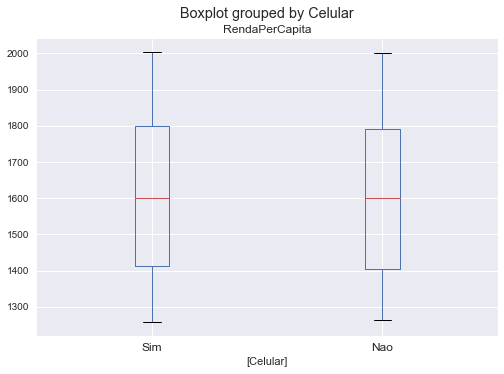

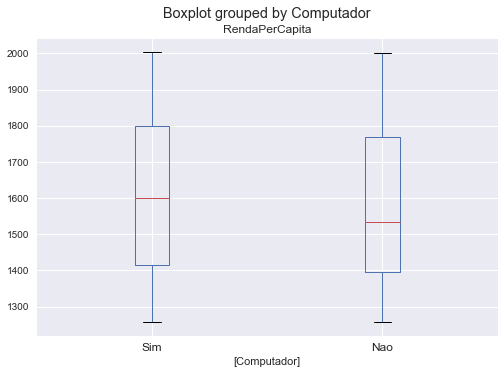

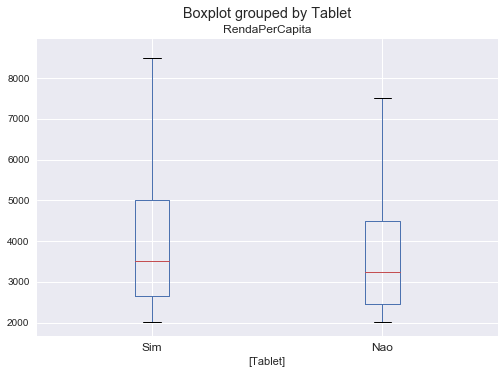

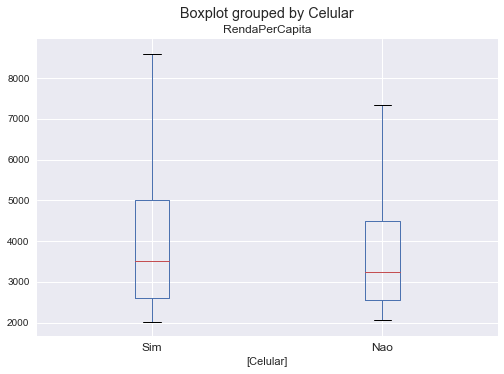

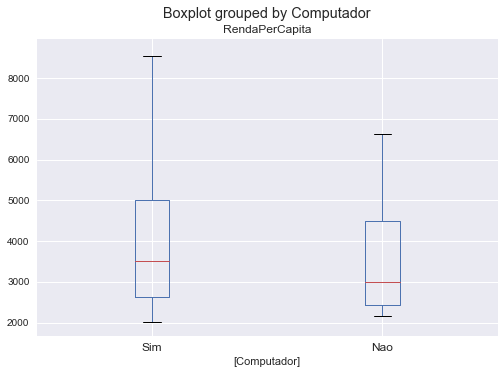

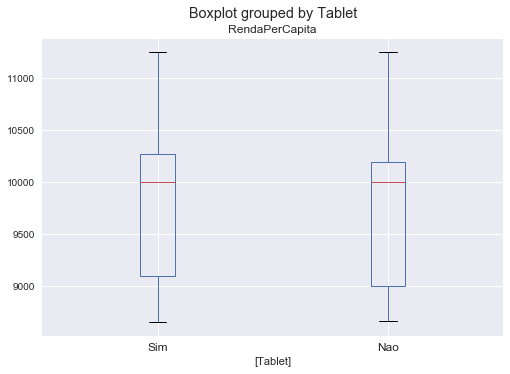

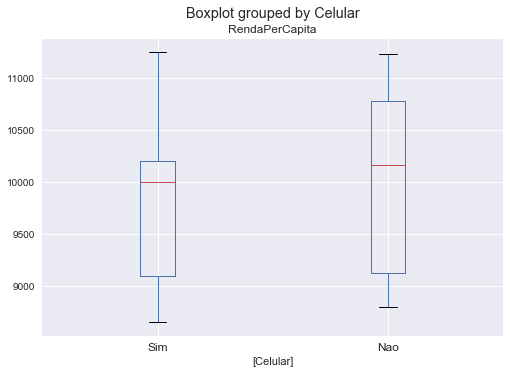

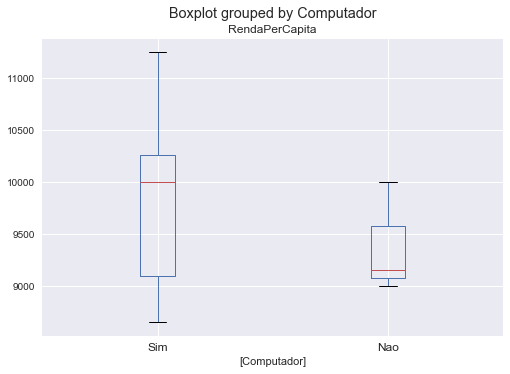

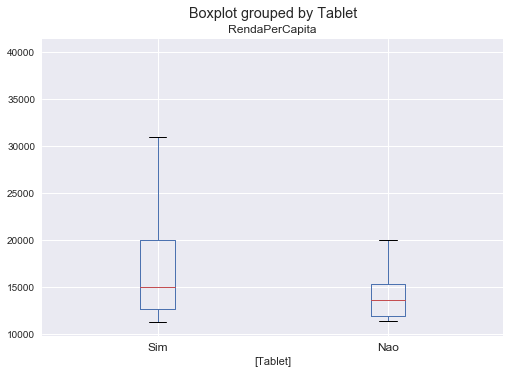

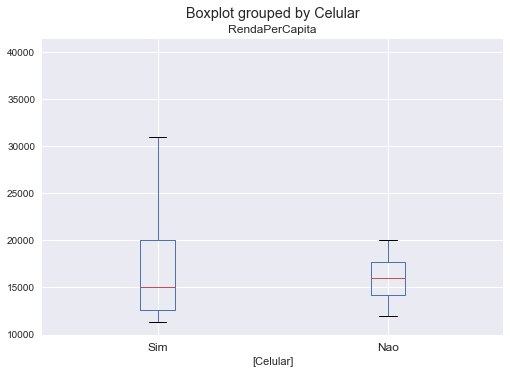

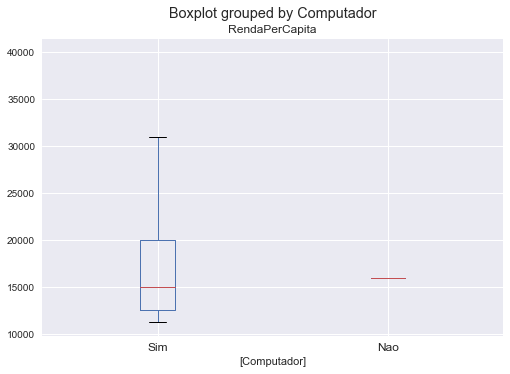

In [112]:
import seaborn

df_filtro_grosso.RendaPerCapita.sum()

# dict_renda = {"ClasseE":df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] <= 1254)].value_counts(),
#             "ClasseD":df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] > 1254)&(df_filtro_grosso["RendaPerCapita"] <= 2004)].value_counts(),
#             "ClasseC":df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] > 2004)&(df_filtro_grosso["RendaPerCapita"] <= 8640)].value_counts(),
#             "ClasseB":df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] > 8640)&(df_filtro_grosso["RendaPerCapita"] <= 11261)].value_counts(),
#             "ClasseA":df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] > 11261)].value_counts()}

vald = {"E":[0,1254],"D":[1254,2004],"C":[2004,8640],"B":[8640,11261],"A":[11261,40000]}

for letra in ["E","D","C","B","A"]:
    exec("df_renda_classe_"+letra+" = df_filtro_grosso[(df_filtro_grosso['RendaPerCapita'] > "+str(vald[letra][0])+")&(df_filtro_grosso['RendaPerCapita'] <= "+str(vald[letra][1])+""")]\ndf_renda_classe_"""+letra+""".boxplot(by = 'Tablet')\ndf_renda_classe_"""+letra+""".boxplot(by = 'Celular')\ndf_renda_classe_"""+letra+".boxplot(by = 'Computador')")



# df_renda_classe_E = df_filtro_grosso[df_filtro_grosso["RendaPerCapita"] <= 1254]
# df_renda_classe_E.boxplot(by = 'Tablet')
# df_renda_classe_E.boxplot(by = 'Celular')
# df_renda_classe_E.boxplot(by = 'Computador')

# df_renda_classe_D = df_filtro_grosso[(df_filtro_grosso["RendaPerCapita"] > 1254)&(df_filtro_grosso["RendaPerCapita"] <= 2004)]
# df_renda_classe_D.boxplot(by = 'Tablet')
# df_renda_classe_D.boxplot(by = 'Celular')
# df_renda_classe_D.boxplot(by = 'Computador')

# df_renda_classe_C = df_filtro_grosso[(df_filtro_grosso["RendaPerCapita"] > 1254)&(df_filtro_grosso["RendaPerCapita"] <= 2004)]
# df_renda_classe_C.boxplot(by = 'Tablet')
# df_renda_classe_C.boxplot(by = 'Celular')
# df_renda_classe_C.boxplot(by = 'Computador')

# df_renda_classe_E.query('Tablet in ["Sim", "Nao"]').boxplot(by=['Tablet'])
# df_renda_classe_E.query('''Celular in ["Sim", "Nao"]''').boxplot(by='Celular')
# df_renda_classe_E.query('''Computador in ["Sim", "Nao"]''').boxplot(by='Computador')


# df_renda_classe_E[df_renda_classe_E["Tablet"] == "Nao"].RendaPerCapita.plot(kind = 'box')#, xlim = (0,200000))
# df_renda_alta = df_filtro_grosso.RendaPerCapita[(df_filtro_grosso["RendaPerCapita"] > 20000) & (df_filtro_grosso["RendaPerCapita"] < 200000)]
# df_renda_alta.plot(kind = 'box')#, xlim = (0,200000))

Sim    14318
Não      449
Name: Computador, dtype: int64

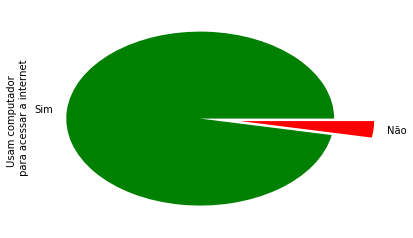

In [7]:
df_filtro_grosso.Computador.value_counts().plot(kind='pie', colors=('green','red'),label="Usam computador \n para acessar a internet",explode = (0, 0.3))
df_filtro_grosso.Computador.value_counts()

Sim    12224
Não     2543
Name: Tablet, dtype: int64

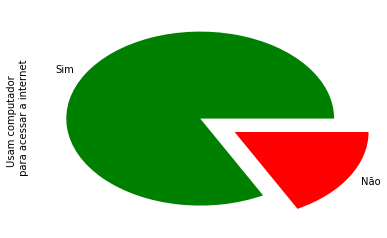

In [8]:
df_filtro_grosso.Tablet.value_counts().plot(kind='pie', colors=('green','red'),label="Usam computador \n para acessar a internet",explode = (0, 0.3))
df_filtro_grosso.Tablet.value_counts()

___
## Conclusão 

Descreva aqui suas conclusões!